In [0]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [576]:
data = pd.read_csv('https://raw.githubusercontent.com/khuhroproeza/Andrew-sML/master/MLex1LinearRegression/ex1data2.txt',header=None, names=['Size','Bedrooms','Price']  )
data.head()


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [577]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Text(0.5, 1.0, 'Price vs Size')

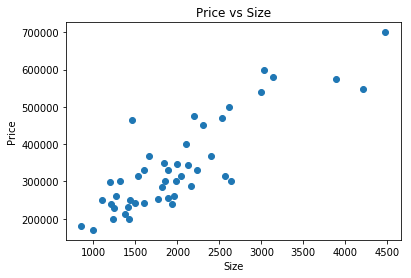

In [578]:

plt.scatter(data['Size'],data['Price'])
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Price vs Size")



Text(0.5, 0, 'BedRoom')

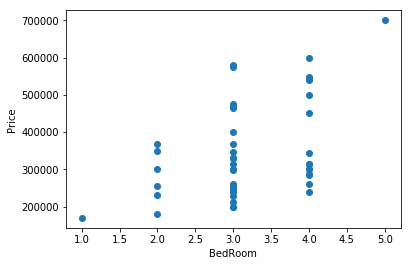

In [579]:
plt.scatter(data['Bedrooms'],data['Price'])
plt.ylabel("Price")
plt.xlabel("BedRoom")

**Feature Normalization:**

![alt text](https://i.ibb.co/YjbmqRp/feature-normal.png)

In [0]:
def featureNormalization(X):
  
  mean = np.mean(X,axis=0)
  std = np.std(X,axis=0)
  
  X_norm = (X - mean)/std
  
  return X_norm, mean, std


In [0]:

def computeCost(X,y,theta):
  m = len(X)
  av = (2*m)
  thetaT = np.transpose(theta) #creates transpose
  func = np.sum(np.power(((X*thetaT)-y),2))  #np.power raises power to 2 of each element
  return func/av

In [0]:
def gradientDescent(X,y,theta,alpha, num_iters):
  m = len(X)
  zerox = (num_iters,0)
  
  thetanum = int(theta.shape[1])
  J_history = np.zeros(num_iters)
  

  temp = np.matrix(np.zeros(theta.shape))
  
  for i in range(num_iters):
    error = ((X*theta.T)-y)
    for j in range(thetanum):
      term = np.multiply(error, X[:,j])
      temp[0,j] = theta[0,j] - ((alpha/m) *np.sum(term))
    theta = temp
    J_history[i] = computeCost(X,y,theta)
    
  return theta, J_history

In [0]:
datax=data.values

In [0]:
y = datax[:,-1]

In [0]:
X =datax[:,0:2]

In [0]:
m=len(datax[:,-1])

In [0]:
X, mean, std = featureNormalization(X)

In [0]:
X = np.append(np.ones((m,1)), X, axis=1)


In [0]:

X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0,0,0]))

In [590]:
X.shape, theta.shape, y.shape

((47, 3), (1, 3), (1, 47))

In [591]:
computeCost(X,y,theta)

3082802761003.5

In [0]:
alpha = 0.0001
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

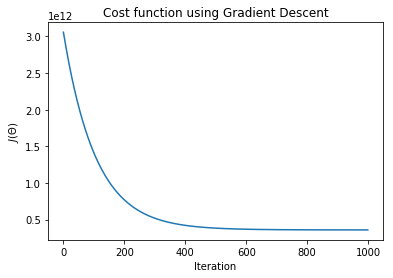

In [593]:
plt.plot(cost)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [594]:
print(g)

[[ 3.37350627e+05 -1.19313320e-11  1.77319112e-11]]
